In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.tree import export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

Step 1: Data Preprocessing

In [2]:
# Load the dataset
data = pd.read_csv("breast-cancer.csv")

data.drop(columns=['id'], inplace=True)

# Encode, split, handle missing cells
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Step 2: Implement Decision Tree Algorithm

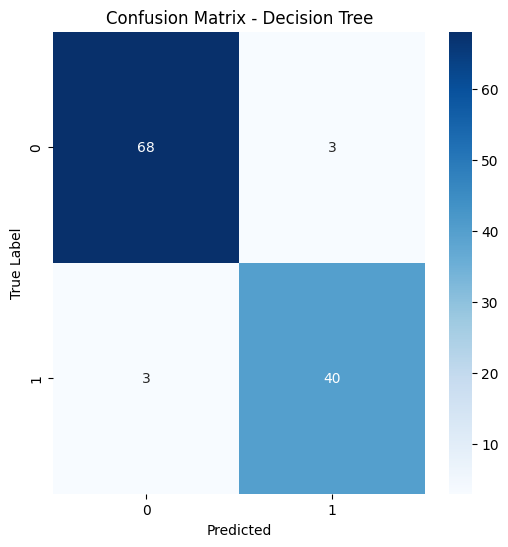

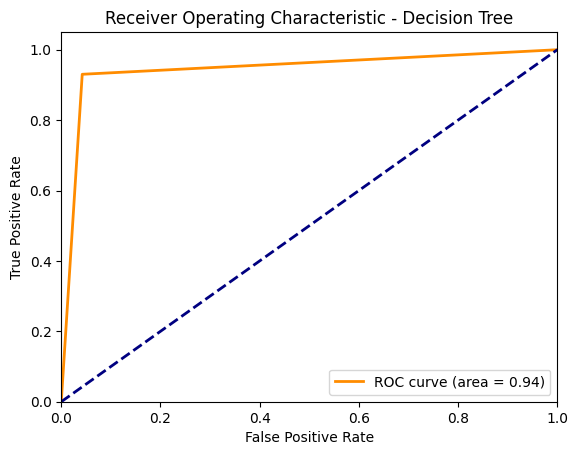

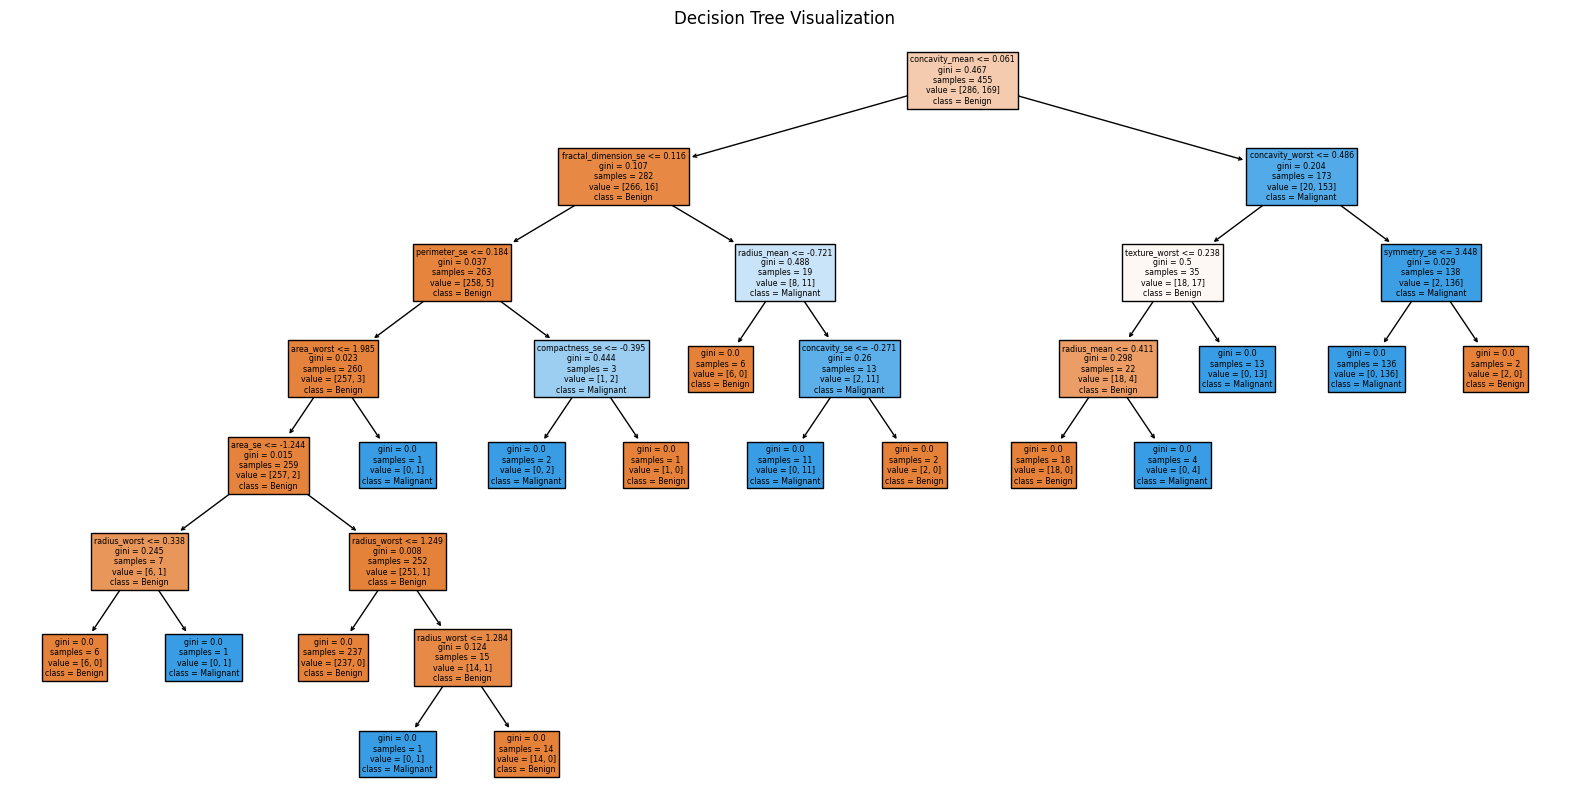

In [3]:
# Train 
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
# Predict
y_pred_dt = dt_model.predict(X_test)
# Evaluate
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)


# confusion matrix & roc curve
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# plot confusion matrix 
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

# Plot ROC curve for Decision Tree
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.legend(loc="lower right")
plt.show()

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=data.columns[:-1], class_names=['Benign', 'Malignant'])
plt.title('Decision Tree Visualization')
plt.show()


Step 3: Implement Nearest-Neighbor Algorithm

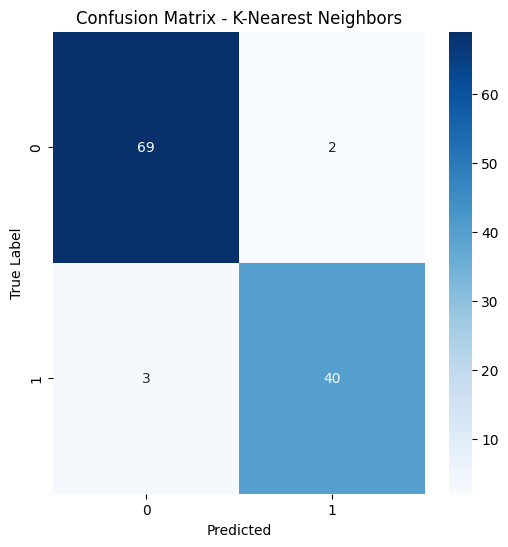

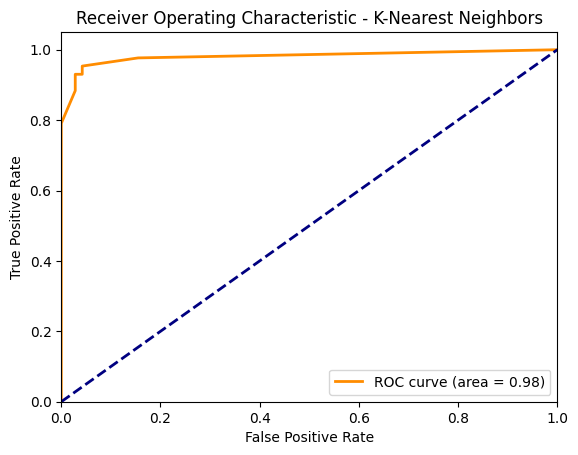

In [4]:
# Train
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)
# Predict
y_pred_knn = knn_model.predict(X_test)
# Evaluate 
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# confusion matrix & ROC
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot confusion matrix for KNN
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

# Plot ROC curve for KNN
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - K-Nearest Neighbors')
plt.legend(loc="lower right")
plt.show()

KNN Decision Boundaries for Two Features

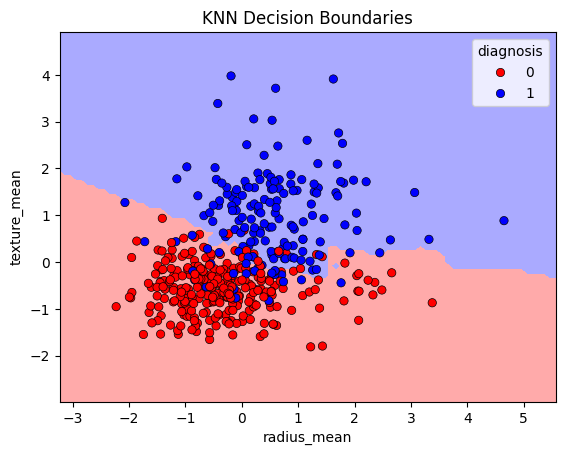

In [5]:
from matplotlib.colors import ListedColormap

# Select two features for visualization
X_pair = X_scaled[:, 1:3]  # Using first two features for simplicity
X_train_pair, X_test_pair, y_train_pair, y_test_pair = train_test_split(X_pair, y, test_size=0.2, random_state=42)

# Train KNN on the selected feature pair
knn_model.fit(X_train_pair, y_train_pair)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#0000FF']

# Plot decision boundaries
x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot training points
sns.scatterplot(x=X_train_pair[:, 0], y=X_train_pair[:, 1], hue=y_train_pair, palette=cmap_bold, alpha=1.0, edgecolor='k')
plt.xlabel(data.columns[1])
plt.ylabel(data.columns[2])
plt.title('KNN Decision Boundaries')
plt.show()


Step 4: Comparative Analysis

In [6]:

results = pd.DataFrame( {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Decision Tree': [accuracy_dt, precision_dt, recall_dt, f1_dt],
    'K-Nearest Neighbor': [accuracy_knn, precision_knn, recall_knn, f1_knn]
} )

print(results)




      Metric  Decision Tree  K-Nearest Neighbor
0   Accuracy       0.947368            0.956140
1  Precision       0.930233            0.952381
2     Recall       0.930233            0.930233
3   F1 Score       0.930233            0.941176
